## Fashion Product Images
In this project we will be predicting a fashion product image's category and gender. The product' s category will be divided into three, Main Category, Sub Category, and Article Type. The learning algorithm that we will be using is only limited to Random Forest and XGBoost.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import pandas as pd 
import seaborn as sns
import os 

In [2]:
# Import Dataset
DATASET_PATH = "/Purwadhika/FINAL PROJECT/test1/fashion-dataset/fashion-dataset/"
print(os.listdir(DATASET_PATH))

['images', 'images.csv', 'styles', 'styles.csv']


### Load Datasets

In [3]:
df_embs = pd.read_csv('embedded2.csv')
df_embs.drop('Unnamed: 0',axis=1,inplace=True)
df_embs.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,5.649736,9.132717,0.000000,8.552013,0.000000,0.106650,16.067930,2.754838,0.000000,0.000000,...,1.330357,0.111984,9.504754,4.337305,0.074342,0.000000,7.377696,0.026429,0.000000,8.451321
1,0.000000,2.788229,0.754297,0.000000,2.539878,3.851845,3.080238,0.000000,0.641055,1.447005,...,0.159295,13.468638,2.867096,1.598586,2.556869,0.378737,5.992522,0.653195,13.689517,11.015627
2,5.914846,2.232292,0.000000,11.802919,0.000000,0.000000,8.595102,3.762110,0.000000,1.319177,...,17.136992,0.000000,3.226575,1.980115,0.000000,0.000000,6.165443,0.948540,1.757253,1.303848
3,0.861216,3.639449,0.000000,3.721268,0.000000,0.000000,0.704272,1.156900,1.219262,2.974664,...,4.385935,3.835477,3.504012,17.089266,0.000000,0.000000,2.154345,2.161019,0.000000,7.274156
4,1.039733,9.232069,0.000000,1.483310,0.000000,0.000000,0.986046,3.571916,0.619291,0.646493,...,0.632879,1.290295,6.424055,0.000000,0.581709,0.000000,18.104776,0.000000,0.000000,0.000000


In [4]:
df = pd.read_csv('final_styles2.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
1,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
2,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
3,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
4,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg


### Load Models

In [9]:
import pickle

model_masterCategory = pickle.load(open('model_masterCategory_final_hyper.sav','rb'))
model_subCategory = pickle.load(open('model_subCategory_final_hyper.sav','rb'))
model_articleType = pickle.load(open('model_articleType_final_hyper.sav','rb'))
model_gender = pickle.load(open('model_gender_final_hyper.sav','rb'))

pca_masterCategory_n20 = pickle.load(open('pca_masterCategory_n20.sav','rb'))
pca_subCategory_n40 = pickle.load(open('pca_subCategory_n40.sav','rb'))
pca_articleType_n40 = pickle.load(open('pca_articleType_n40.sav','rb'))
pca_gender_n40 = pickle.load(open('pca_gender_n40.sav','rb'))

In [12]:
model_masterCategory

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=101, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [13]:
pca_masterCategory_n20

PCA(copy=True, iterated_power='auto', n_components=20, random_state=101,
    svd_solver='auto', tol=0.0, whiten=False)

### Configure Loading Images

In [14]:
import tensorflow as tf
import keras
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D

Using TensorFlow backend.


In [15]:
# Input Shape
img_width, img_height, _ = 224, 224, 3

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

D:\source\Installed Program Files\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [144]:
# functions for image loading and plotting
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):  
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return DATASET_PATH+"images/"+img

def load_image(img, resized_fac = 0.5):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

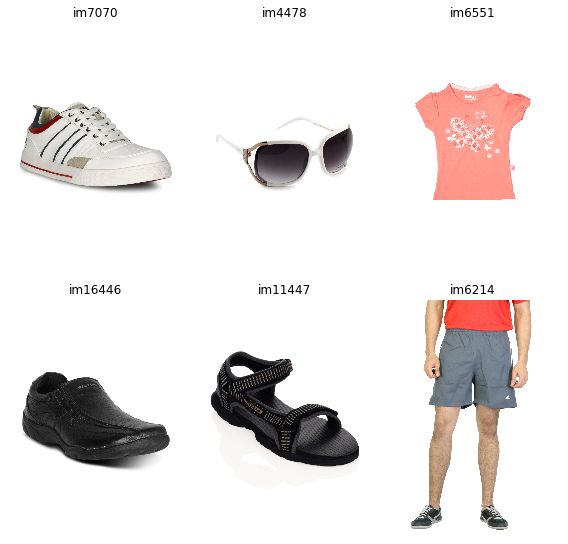

In [145]:
# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

In [18]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

### Load image from URL

In [167]:
import urllib.request
from io import BytesIO

def load_image_url(url, resized_fac = 0.5):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    
    w, h, _ = image.shape
    resized = cv2.resize(image, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    
    # return the image
    return resized

def get_embedding_url(model, url):
    # Reshape
    img = loadImage(url)
#     resp = urllib.request.urlopen(url)
#     img = np.asarray(bytearray(resp.read()), dtype="uint8")
#     img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

def loadImage(URL):
    try:
        with urllib.request.urlopen(URL) as url:
            img = image.load_img(BytesIO(url.read()), target_size=(img_width, img_height))
            return image.img_to_array(img)
    except:
        print('HTTP Error 403: Forbidden')
        return False

#### Example Prediction image from URL

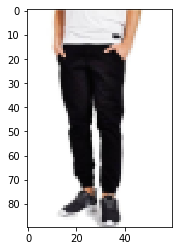

In [113]:
url_image = "https://s.blanja.com/picspace/272/111888/600.900_eb93f0e90064471a92b16770cf12e859.JPG"

emb = get_embedding_url(model, url_image)
emb = pd.DataFrame(emb).transpose()

img_array = load_image_url(url_image)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [114]:
# Predict Master Category
feature_pca = pca_masterCategory_n20.transform(emb)
dfPCA = pd.DataFrame(feature_pca,columns=['PCA'+str(i) for i in range(1,21)])

pred_master = model_masterCategory.predict(dfPCA)[0]
print('Master Category Prediction : ' + pred_master)

Master Category Prediction : Apparel


In [115]:
# Predict Sub Category
feature_pca = pca_subCategory_n40.transform(emb)
dfPCA = pd.DataFrame(feature_pca,columns=['PCA'+str(i) for i in range(1,41)])

# adding master category prediction result as feature
dfpred = pd.DataFrame([pred_master],columns=['masterCategory'])
dfpred = dfpred.append(pd.DataFrame([df['masterCategory'].unique()],index=['masterCategory']).transpose())
dfpred = pd.DataFrame(pd.get_dummies(dfpred,drop_first=True).iloc[0]).transpose()

dfPCA = dfPCA.join(dfpred)

pred_sub = model_subCategory.predict(dfPCA)[0]
print('Sub Category Prediction : ' + pred_sub)

Sub Category Prediction : Bottomwear


In [116]:
# Predict Article Type
feature_pca = pca_articleType_n40.transform(emb)
dfPCA = pd.DataFrame(feature_pca,columns=['PCA'+str(i) for i in range(1,41)])

# adding master category prediction result as feature
dfpred = pd.DataFrame([pred_master],columns=['masterCategory'])
dfpred = dfpred.append(pd.DataFrame([df['masterCategory'].unique()],index=['masterCategory']).transpose())
dfpred = pd.DataFrame(pd.get_dummies(dfpred,drop_first=True).iloc[0]).transpose()

dfPCA = dfPCA.join(dfpred)

# adding sub category prediction result as feature
dfpred = pd.DataFrame([pred_sub],columns=['subCategory'])
dfpred = dfpred.append(pd.DataFrame([df['subCategory'].unique()],index=['subCategory']).transpose())
dfpred = pd.DataFrame(pd.get_dummies(dfpred,drop_first=True).iloc[0]).transpose()

dfPCA = dfPCA.join(dfpred)

pred_art = model_articleType.predict(dfPCA)[0]
print('Article Type Prediction : ' + pred_art)

Article Type Prediction : Jeans


In [119]:
# Predict Gender
feature_pca = pca_gender_n40.transform(emb)
dfPCA = pd.DataFrame(feature_pca,columns=['PCA'+str(i) for i in range(1,41)])

# adding master category prediction result as feature
dfpred = pd.DataFrame([pred_master],columns=['masterCategory'])
dfpred = dfpred.append(pd.DataFrame([df['masterCategory'].unique()],index=['masterCategory']).transpose())
dfpred = pd.DataFrame(pd.get_dummies(dfpred,drop_first=True).iloc[0]).transpose()

dfPCA = dfPCA.join(dfpred)

# adding sub category prediction result as feature
dfpred = pd.DataFrame([pred_sub],columns=['subCategory'])
dfpred = dfpred.append(pd.DataFrame([df['subCategory'].unique()],index=['subCategory']).transpose())
dfpred = pd.DataFrame(pd.get_dummies(dfpred,drop_first=True).iloc[0]).transpose()

dfPCA = dfPCA.join(dfpred)

# adding article type prediction result as feature
dfpred = pd.DataFrame([pred_art],columns=['articleType'])
dfpred = dfpred.append(pd.DataFrame([df['articleType'].unique()],index=['articleType']).transpose())
dfpred = pd.DataFrame(pd.get_dummies(dfpred,drop_first=True).iloc[0]).transpose()

dfPCA = dfPCA.join(dfpred)

pred_gen = model_gender.predict(dfPCA)[0]
print('Gender Prediction : ' + pred_gen)

Gender Prediction : Men


### Creating function for prediction

In [202]:
def predict_fashion_image(url):
    print('Prediction')
    
    emb = get_embedding_url(model, url)
    emb = pd.DataFrame(emb).transpose()
    
    # Predict Master Category
    feature_pca = pca_masterCategory_n20.transform(emb)
    dfPCA = pd.DataFrame(feature_pca,columns=['PCA'+str(i) for i in range(1,21)])

    pred_master = model_masterCategory.predict(dfPCA)[0]
    proba_master = model_masterCategory.predict_proba(dfPCA).max()*100
    print('Master Category\t: ' + pred_master + ' (' + str(round(proba_master,2)) + '%)')
    
    # Predict Sub Category
    feature_pca = pca_subCategory_n40.transform(emb)
    dfPCA = pd.DataFrame(feature_pca,columns=['PCA'+str(i) for i in range(1,41)])

    # adding master category prediction result as feature
    dfpred = pd.DataFrame([pred_master],columns=['masterCategory'])
    dfpred = dfpred.append(pd.DataFrame([df['masterCategory'].unique()],index=['masterCategory']).transpose())
    dfpred = pd.DataFrame(pd.get_dummies(dfpred,drop_first=True).iloc[0]).transpose()

    dfPCA = dfPCA.join(dfpred)

    pred_sub = model_subCategory.predict(dfPCA)[0]
    proba_sub = model_subCategory.predict_proba(dfPCA).max()*100
    print('Sub Category\t: ' + pred_sub + ' (' + str(round(proba_sub,2)) + '%)')
    
    # Predict Article Type
    feature_pca = pca_articleType_n40.transform(emb)
    dfPCA = pd.DataFrame(feature_pca,columns=['PCA'+str(i) for i in range(1,41)])

    # adding master category prediction result as feature
    dfpred = pd.DataFrame([pred_master],columns=['masterCategory'])
    dfpred = dfpred.append(pd.DataFrame([df['masterCategory'].unique()],index=['masterCategory']).transpose())
    dfpred = pd.DataFrame(pd.get_dummies(dfpred,drop_first=True).iloc[0]).transpose()

    dfPCA = dfPCA.join(dfpred)

    # adding sub category prediction result as feature
    dfpred = pd.DataFrame([pred_sub],columns=['subCategory'])
    dfpred = dfpred.append(pd.DataFrame([df['subCategory'].unique()],index=['subCategory']).transpose())
    dfpred = pd.DataFrame(pd.get_dummies(dfpred,drop_first=True).iloc[0]).transpose()

    dfPCA = dfPCA.join(dfpred)

    pred_art = model_articleType.predict(dfPCA)[0]
    proba_art = model_articleType.predict_proba(dfPCA).max()*100
    print('Article Type\t: ' + pred_art + ' (' + str(round(proba_art,2)) + '%)')
    
    # Predict Gender
    feature_pca = pca_gender_n40.transform(emb)
    dfPCA = pd.DataFrame(feature_pca,columns=['PCA'+str(i) for i in range(1,41)])

    # adding master category prediction result as feature
    dfpred = pd.DataFrame([pred_master],columns=['masterCategory'])
    dfpred = dfpred.append(pd.DataFrame([df['masterCategory'].unique()],index=['masterCategory']).transpose())
    dfpred = pd.DataFrame(pd.get_dummies(dfpred,drop_first=True).iloc[0]).transpose()

    dfPCA = dfPCA.join(dfpred)

    # adding sub category prediction result as feature
    dfpred = pd.DataFrame([pred_sub],columns=['subCategory'])
    dfpred = dfpred.append(pd.DataFrame([df['subCategory'].unique()],index=['subCategory']).transpose())
    dfpred = pd.DataFrame(pd.get_dummies(dfpred,drop_first=True).iloc[0]).transpose()

    dfPCA = dfPCA.join(dfpred)

    # adding article type prediction result as feature
    dfpred = pd.DataFrame([pred_art],columns=['articleType'])
    dfpred = dfpred.append(pd.DataFrame([df['articleType'].unique()],index=['articleType']).transpose())
    dfpred = pd.DataFrame(pd.get_dummies(dfpred,drop_first=True).iloc[0]).transpose()

    dfPCA = dfPCA.join(dfpred)

    pred_gen = model_gender.predict(dfPCA)[0]
    proba_gen = model_gender.predict_proba(dfPCA).max()*100
    print('Gender\t\t: ' + pred_gen + ' (' + str(round(proba_gen,2)) + '%)')
    
    return pred_master, pred_sub, pred_art, pred_gen

In [184]:
def show_image(url):
    try:
        emb = get_embedding_url(model, url)
        emb = pd.DataFrame(emb).transpose()

        img_array = load_image_url(url)

        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)   

        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    except:
        return False

Prediction
Master Category	: Accessories (99.99%)
Sub Category	: Watches (97.0%)
Article Type	: Watches (100.0%)
Gender		: Men (95.69%)


('Accessories', 'Watches', 'Watches', 'Men')

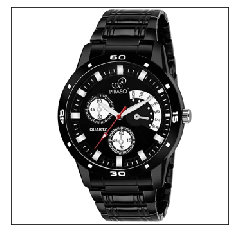

In [203]:
url = 'https://images-na.ssl-images-amazon.com/images/I/61WixzlVuXL._UX679_.jpg'
show_image(url)
predict_fashion_image(url)

Prediction
Master Category	: Footwear (100.0%)
Sub Category	: Shoes (83.0%)
Article Type	: Sports Shoes (44.0%)
Gender		: Women (95.37%)


('Footwear', 'Shoes', 'Sports Shoes', 'Women')

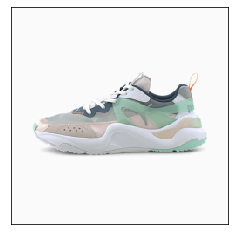

In [204]:
url = "https://images.puma.com/image/upload/f_auto,q_auto,b_rgb:fafafa,w_500,h_500/global/371777/01/sv01/fnd/PNA/fmt/png/Rise-Women's-Sneakers"
show_image(url)
predict_fashion_image(url)

Prediction
Master Category	: Apparel (99.93%)
Sub Category	: Topwear (41.0%)
Article Type	: Jackets (39.0%)
Gender		: Men (99.06%)


('Apparel', 'Topwear', 'Jackets', 'Men')

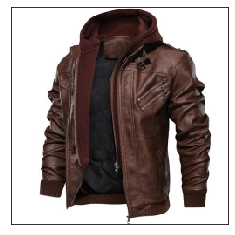

In [205]:
url = "https://cdn.shopify.com/s/files/1/0115/6254/9306/products/dasdsadas_500x.jpg?v=1568993727"
show_image(url)
predict_fashion_image(url)

Prediction
Master Category	: Personal Care (100.0%)
Sub Category	: Lips (90.0%)
Article Type	: Lipstick (86.0%)
Gender		: Women (99.62%)


('Personal Care', 'Lips', 'Lipstick', 'Women')

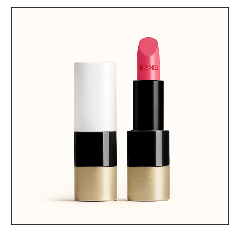

In [206]:
url = "https://assets.hermes.com/is/image/hermesproduct/rouge-hermes-satin-lipstick-rose-lipstick--60001SV040-worn-1-0-0-1100-1100_b.jpg"
show_image(url)
predict_fashion_image(url)

In [207]:
# some images are inaccessible
url = "https://cdn.wallpaperhub.app/cloudcache/1/b/5/8/e/f/1b58ef6e3d36a42e01992accf5c52d6eea244353.jpg"
f = show_image(url)
if f :
    predict_fashion_image(url)

HTTP Error 403: Forbidden


Prediction
Master Category	: Accessories (72.59%)
Sub Category	: Wallets (25.0%)
Article Type	: Wallets (70.0%)
Gender		: Women (69.43%)


('Accessories', 'Wallets', 'Wallets', 'Women')

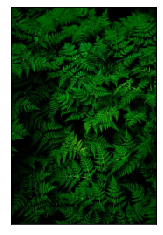

In [208]:
# trying image out of category
url = "https://images.unsplash.com/photo-1497250681960-ef046c08a56e?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=334&q=80"
show_image(url)
predict_fashion_image(url)

Prediction
Master Category	: Apparel (99.85%)
Sub Category	: Bottomwear (30.0%)
Article Type	: Skirts (20.0%)
Gender		: Women (97.76%)


('Apparel', 'Bottomwear', 'Skirts', 'Women')

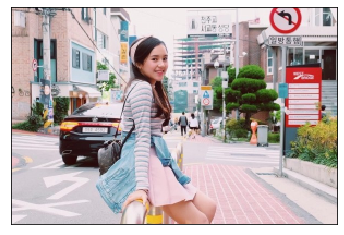

In [209]:
# trying complex image
url = "https://cdn.idntimes.com/content-images/community/2018/02/bebytsabina-bcjqhqtdfcu-952325c4feaf8a46ac0e9a2e4d6b1d8f_600x400.jpg"
show_image(url)
predict_fashion_image(url)

Prediction
Master Category	: Apparel (99.56%)
Sub Category	: Topwear (40.0%)
Article Type	: Tops (34.0%)
Gender		: Women (99.82%)


('Apparel', 'Topwear', 'Tops', 'Women')

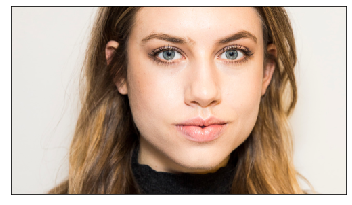

In [210]:
# trying a face
url = "https://media.glamour.com/photos/5a425fd3b6bcee68da9f86f8/16:9/w_2560%2Cc_limit/best-face-oil.png"
show_image(url)
predict_fashion_image(url)